# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [10]:
import sys
sys.path.append("../")
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [11]:
#If you make a change to datarun.py, run this cell or restart your kernel
import importlib
importlib.reload(datarun)

<module 'datarun' from '/home/ben/Documents/Repos/MOTsArentForKids/MOT_loading_time/../datarun.py'>

In [15]:
d = datarun.Experiment(
    vstart = 20,
    vend = 80,
    vstep = 20, 
    idx_start = 164,
    datapath = "../data/mar30/load_time/",
    numtrials = 20,
    mask = .15
)

on 21: Found 2 blobs                                                            
|████████████████████████████████████████| 80/80 [100%] in 1:49.6 (0.73/s)      


In [16]:
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))
N_list = d.structure_data(lambda d: d.atom_number_px_sum())


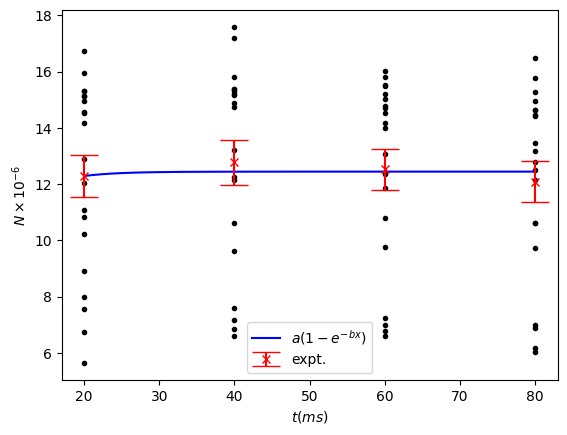

In [18]:
N_list_copy=N_list.copy()
stats_dict={key:(np.mean(N_list_copy[key].copy()),np.std(N_list_copy[key].copy())) for key in N_list_copy.keys()}
for key,val in N_list.items():
    mean = np.mean(val)
    stdev = np.std(val)
    for item in val:
        if np.abs(item-mean) > 2*stdev:
            N_list[key].remove(item)
            print("removed")
    
yerr = [np.nanstd(N_list_copy[key]) for key in N_list_copy]/np.sqrt(20)

y_plot=[np.nanmean(n) for n in N_list_copy.values()]
x_plot=list(N_list_copy.keys())
popt,pcov=curve_fit(loading_dyn,x_plot,y_plot, p0 = (1e8,1e-1), sigma=yerr)

xdata=np.linspace(min(x_plot),max(x_plot),10000)
ydata=loading_dyn(xdata,*popt)

plt.plot(xdata,np.array(ydata)*1e-6,'-b', label = r"$a(1-e^{-bx})$")

plt.errorbar(x_plot, np.array(y_plot)*1.e-6, yerr*1e-6, linestyle = "None", color = "r", capsize = 10, marker = "x", label = "expt.")
for datum in d.data:
    plt.scatter(datum.value, datum.atom_number_px_sum()*1e-6, color = "k", marker = '.', linestyle = "None")

plt.xlabel(r"$t (ms)$")
plt.ylabel(r"$N \times 10^{-6}$")
plt.legend()

## Plot fits

In [35]:
runs = d.structure_data()
runs

{2.5: <datarun.DataRun at 0x7f87ab9de1d0>,
 2.65: <datarun.DataRun at 0x7f87abb661d0>,
 2.8: <datarun.DataRun at 0x7f87abba8510>,
 2.95: <datarun.DataRun at 0x7f87aa7db610>,
 3.1: <datarun.DataRun at 0x7f87abc09850>}

In [31]:
popt

array([1.79856822e+04, 1.02021614e-01])

In [34]:
np.sqrt(pcov[0][0])

465.42944435559184

In [35]:
np.sqrt(pcov[1][1])

0.005574975118016282

In [37]:
popt[1]/popt[0]

5.672379408046771e-06

In [38]:
np.sqrt((pcov[1][1]/popt[0]**2)+(popt[1]**2/popt[0]**4*pcov[0][0]))

3.4296744603344166e-07